# Analysis of Mental Health in Tech

### Emma Blumenkrantz
### May 7, 2025

# Introduction

The tech industry is known for its fast-paced, high-pressure environment—conditions that can significantly impact the mental health of those working in 
it. As awareness around mental health has grown in recent years, so too has the need to understand how these issues specifically affect tech professionals. This project analyzes data from a survey conducted by Open Sourcing Mental Illness (OSMI), which focuses on the mental health experiences of individuals in tech-related roles. The goal of this analysis is to explore patterns in treatment-seeking behavior, gender differences, and the perceived role of employer support in mental health outcomes.
    
Mental health conditions such as anxiety, depression, and burnout are widespread in the tech industry, but stigma and lack of resources often discourage 
open discussion and treatment. According to Evans and Kotze (2019), many professionals are reluctant to disclose their mental health status to employers due to fear of negative consequences. With the rise of remote work and blurred boundaries between personal and professional life, these issues have only become more complex. Through this analysis, we aim to uncover insights into how tech workers are managing their mental health and whether organizational support systems are making a measurable impact.

## Methods

This analysis uses data from the 2014 Mental Health in Tech Survey, conducted by Open Sourcing Mental Illness (OSMI). The dataset, available via Kaggle, contains anonymized responses from over 60,000 individuals working in technology-related roles. Respondents provided information about their age, gender, country, facts about the company, and experiences with mental health, including whether they had a medical diagnosis, whether they sought treatment, any family history of mental illness, and the conditions they experience.

To explore relationships between variables, we used descriptive statistics, visualizations, and statistical tests. In particular, chi-square tests for independence were applied to investigate whether there were statistically significant associations between categorical variables such as gender and treatment-seeking behavior or employer factors and mental health outcomes. The significance level for all tests was set at 0.05.

In addition to traditional statistical techniques, decision tree classification models were employed to identify the most influential predictors of treatment-seeking behavior among respondents. This machine learning approach allowed for a more nuanced understanding of how combinations of factors contribute to mental health outcomes. The decision tree was trained using a subset of the dataset and validated with a test split to assess accuracy and interpretability. After fitting the decision tree, we evaluated its performance using a classification report, which provided precision, recall, F1-score, and overall accuracy metrics. These evaluation metrics were particularly important for understanding how well the model balanced false positives and false negatives—especially given the societal implications of under- or overestimating treatment-seeking behavior. The F1-score, in particular, offered a useful summary measure for assessing model performance in the context of potentially imbalanced classes.

### Importing packages

Below I am importing the packages and libraries that will be used throughout the research project.

In [1]:
# import pandas, scipy, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'

### Importing the Data

Here I am importing the dataset and renaming the columns.

In [3]:
os = pd.read_csv('OSMI_Survey_Data.csv')

In [4]:
# Rename columns to be more intuitive
os.columns = ['index', 'ResponseID', "Self_employed", "Size_company", "Tech_company", "TechIT_Job", "Previous_employer", "Family_hist", "Past_MentalHealth", "Current_MentalHealth", "Yes_Current_Conditions", "Maybe_Believed_Conditions", "Med_Prof_Diagnose", "Diagnosed_Conditions", "Sought_Treatment", "Age", "Gender", "Age_Group", "Country_live", "US_State/territory_live", "Country_work", "US_State/territory_work", "Work_description", "Remotely", "Question Group", "Speak_openly", "Question", "Response"]

### Summary statistics

This data set contains 60,186 observations across 28 variables.

In [5]:
# show shape of data
os.shape

(60186, 28)

Here are the counts for those with and without a medical professional diagnosis of a mental health disorder.

In [6]:
# What are the distinct values for have you been diagnosed with a mental health disorder by a medical professional
os['Med_Prof_Diagnose'].value_counts()

Med_Prof_Diagnose
False    30114
True     30072
Name: count, dtype: int64

Here are the percentages of those values.

In [118]:
# Calculate the proportions of the ones that have been diagnosed and make percentages
os['Med_Prof_Diagnose'].value_counts(normalize=True) * 100

Med_Prof_Diagnose
False    50.034892
True     49.965108
Name: proportion, dtype: float64

Here is the frequency of a person working at a tech company.

In [119]:
# Calculate frequency of tech company
os['Tech_company'].value_counts()

Tech_company
True     37086
False    11046
Name: count, dtype: int64

Here are the perentages of tech vs non-tech company.

In [120]:
# calculate the percentage of tech company
os['Tech_company'].value_counts(normalize=True) * 100

Tech_company
True     77.050611
False    22.949389
Name: proportion, dtype: float64

We are now comparing the counts of diagnosis related to whether or not they work for a tech company.

In [121]:
# Make a neat table with tech company and diagnosis counts
pd.crosstab(os['Tech_company'], os['Med_Prof_Diagnose'])
# add labels
pd.crosstab(os['Tech_company'], os['Med_Prof_Diagnose'], rownames=['Tech Company'], colnames=['Diagnosed']).rename(columns={0: 'No', 1: 'Yes'}).rename(index={0: 'No', 1: 'Yes'})

Diagnosed,No,Yes
Tech Company,,
No,5460,5586
Yes,18858,18228


Here is another comparison of two categorical variables: Country you work in and Mental Health diagnosis. (Only showing the top 10)

In [122]:
# Calculate the frequency of each Coutnry you work in
# limit to top 10
os['Country_work'].value_counts().head(10)

Country_work
United States of America    35742
United Kingdom               7686
Canada                       3108
Germany                      2436
Netherlands                  1974
Australia                    1428
Sweden                        840
Ireland                       630
France                        588
Switzerland                   420
Name: count, dtype: int64

Here is a frequency table of the different countries featuring the top 10 countries with the most number of tech companies. (Only displayign top 10 true counts)

In [123]:
# Group by country and tech company, and count occurrences
country_tech_counts = os.groupby(['Country_work', 'Tech_company']).size().unstack(fill_value=0)

# Sort by the 'True' column (tech companies) in descending order
sorted_country_tech_counts = country_tech_counts.sort_values(by=True, ascending=False)

# Display only the top 10 countries
top_10_countries_tech = sorted_country_tech_counts.head(10)
top_10_countries_tech



Tech_company,False,True
Country_work,,
United States of America,7098,22974
United Kingdom,1512,4074
Canada,378,2184
Germany,378,1470
Netherlands,378,924
Australia,210,882
Sweden,126,504
France,42,420
Russia,0,378


This next frequency table identifies the top 10 countries with the most number of medical professional diagnoses of a mental illness. (Only displaying top 10)

In [124]:
# Create a crosstab of countries and mental health diagnoses
country_diagnosis_counts = pd.crosstab(os['Country_work'], os['Med_Prof_Diagnose'])

# Add a total column to calculate the total frequency for each country
country_diagnosis_counts['Total'] = country_diagnosis_counts.sum(axis=1)

# Sort by the total frequency in descending order
sorted_country_diagnosis_counts = country_diagnosis_counts.sort_values(by='Total', ascending=False)

# Display only the top 10 countries
top_10_countries_dg = sorted_country_diagnosis_counts.head(10)

# Drop the 'Total' column for display purposes (optional)
top_10_countries_dg = top_10_countries_dg.drop(columns=['Total'])
top_10_countries_dg


Med_Prof_Diagnose,False,True
Country_work,,
United States of America,15750,19992
United Kingdom,4368,3318
Canada,1848,1260
Germany,1554,882
Netherlands,966,1008
Australia,462,966
Sweden,546,294
Ireland,294,336
France,462,126


This table also lists the countries and the diagnosis but limits it to only participants who work at tech companies. (Only displaying top 10)

In [125]:
# Filter the dataset to include only individuals working at a tech company
tech_company_data = os[os['Tech_company'] == True]

# Create a crosstab of countries and mental health diagnoses for tech company employees
country_diagnosis_counts = pd.crosstab(tech_company_data['Country_work'], tech_company_data['Med_Prof_Diagnose'])

# Add a total column to calculate the total frequency for each country
country_diagnosis_counts['Total'] = country_diagnosis_counts.sum(axis=1)

# Sort by the total frequency in descending order
sorted_country_diagnosis_counts = country_diagnosis_counts.sort_values(by='Total', ascending=False)

# Display only the top 10 countries
top_10_countries_dg_tc = sorted_country_diagnosis_counts.head(10)

# Drop the 'Total' column for display purposes (optional)
top_10_countries_dg_tc = top_10_countries_dg_tc.drop(columns=['Total'])

# Display the result
top_10_countries_dg_tc

Med_Prof_Diagnose,False,True
Country_work,,
United States of America,10374,12600
United Kingdom,2394,1680
Canada,1218,966
Germany,924,546
Netherlands,546,378
Australia,294,588
Sweden,294,210
France,336,84
Russia,378,0


## Comparative numerical analysis

Here are some statistics on the ages of participants.

In [126]:
# Give age statistics
os['Age'].describe()

count    60102.000000
mean        34.106219
std          8.283055
min         15.000000
25%         28.000000
50%         33.000000
75%         39.000000
max         99.000000
Name: Age, dtype: float64

Next, we will compare age and professional mental health diagnosis.

In [127]:
# Calculate the mean age for each category of mental health diagnosis
os.groupby('Med_Prof_Diagnose')['Age'].mean()

Med_Prof_Diagnose
False    33.537709
True     34.675524
Name: Age, dtype: float64

- Looks to be about the same maybe they are not associated.

Here is information regarding the countries with the highest percentage of tech companies.

In [128]:
# Find top 5 countries with the highest percentage of tech companies and mental health diagnosis
tech_company_counts = os['Country_work'].value_counts(normalize=True) * 100
tech_company_counts = tech_company_counts[tech_company_counts > 0]
tech_company_counts = tech_company_counts.reset_index()
tech_company_counts.columns = ['Country', 'Percentage']
# Find the top 5 countries with the highest percentage of tech companies
top_5_tech_countries = tech_company_counts.nlargest(5, 'Percentage')
# Print these findings
print('Top 5 countries with the highest percentage of tech companies:')
print(top_5_tech_countries)

Top 5 countries with the highest percentage of tech companies:
                    Country  Percentage
0  United States of America   59.385904
1            United Kingdom   12.770412
2                    Canada    5.163992
3                   Germany    4.047453
4               Netherlands    3.279833


# Results and Discussion

## Data Visualization

In [129]:
# this is code to tell the computer to display things in high resolution since the base is low resolution
%config InlineBackend.figure_format = 'retina'
#create plots on white background and add grid if appropriate
sns.set_style('whitegrid')

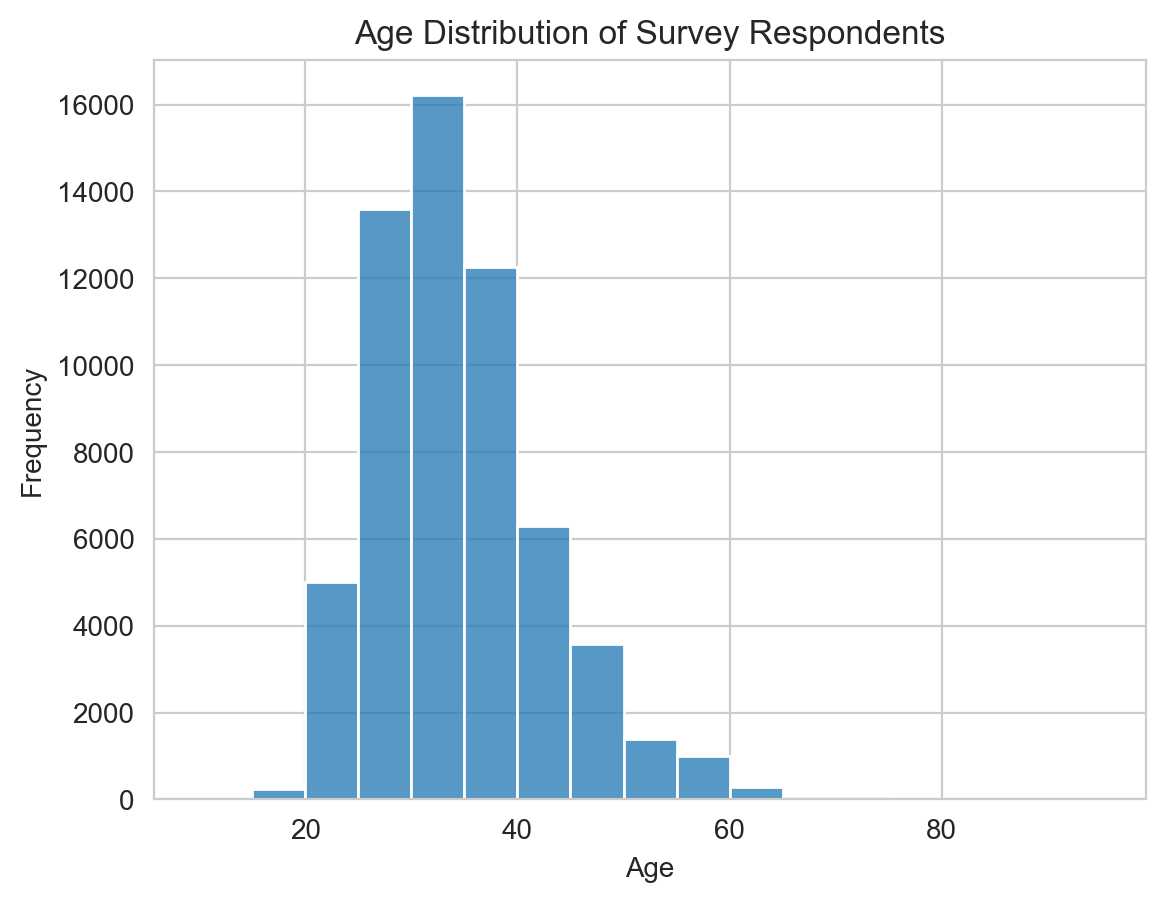

In [130]:
# create a plot of the age column using sns
sns.histplot(os['Age'], bins=range(10,100,5));
# add a title
plt.title('Age Distribution of Survey Respondents')
# add x and y labels
plt.xlabel('Age')
plt.ylabel('Frequency');

- Here is a histogram of the age distribution across both those with a medical professional diagonsis of a mental health disorder and those without one. The graph appears to be slightly skewed to the right.

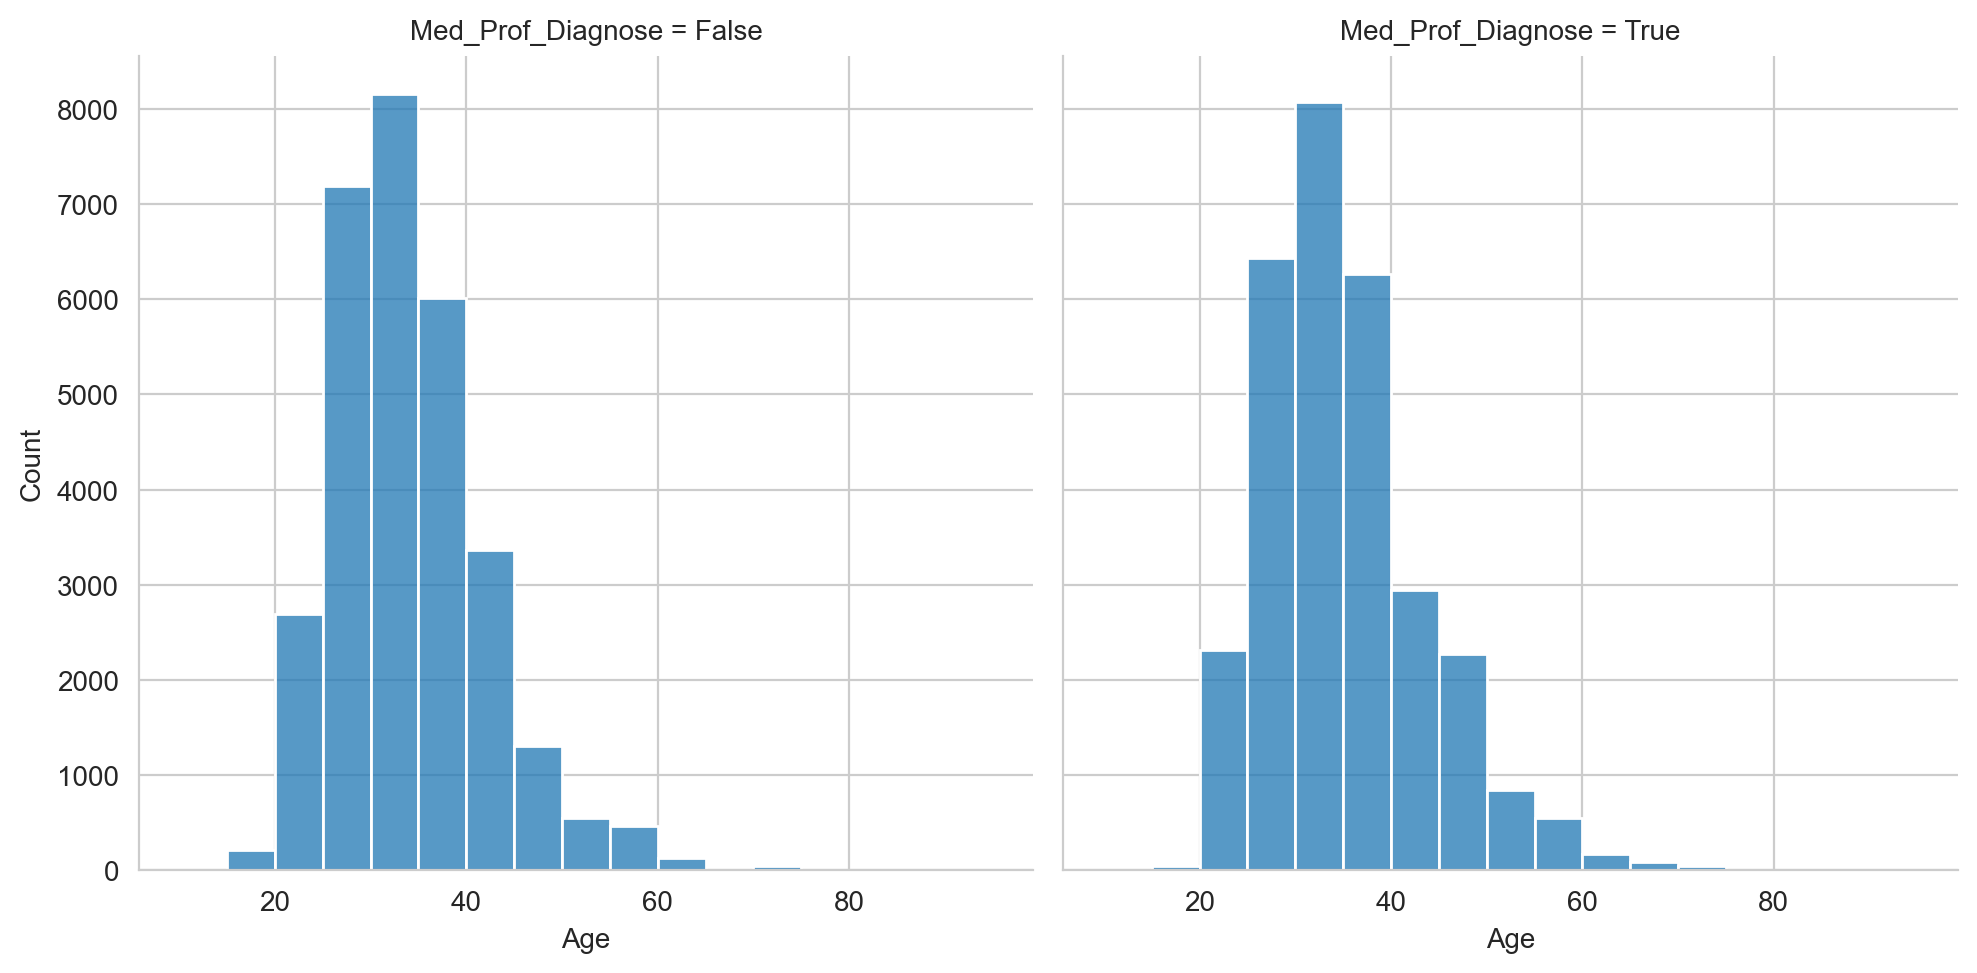

In [131]:
# create a histogram of age by category of mental health diagnosis using displot and col argument
sns.displot(data=os, x='Age', col='Med_Prof_Diagnose', bins=range(10,100,5));
# add x and y labels to both plots
plt.xlabel('Age')
plt.ylabel('Frequency');

- The following visualization is to show the frequency of those with or without a mental health diagnosis by a professional and whether or not they worked at a tech company. Just based on this visual it s like there is a pretty even split, but further statistical analysis is needed.

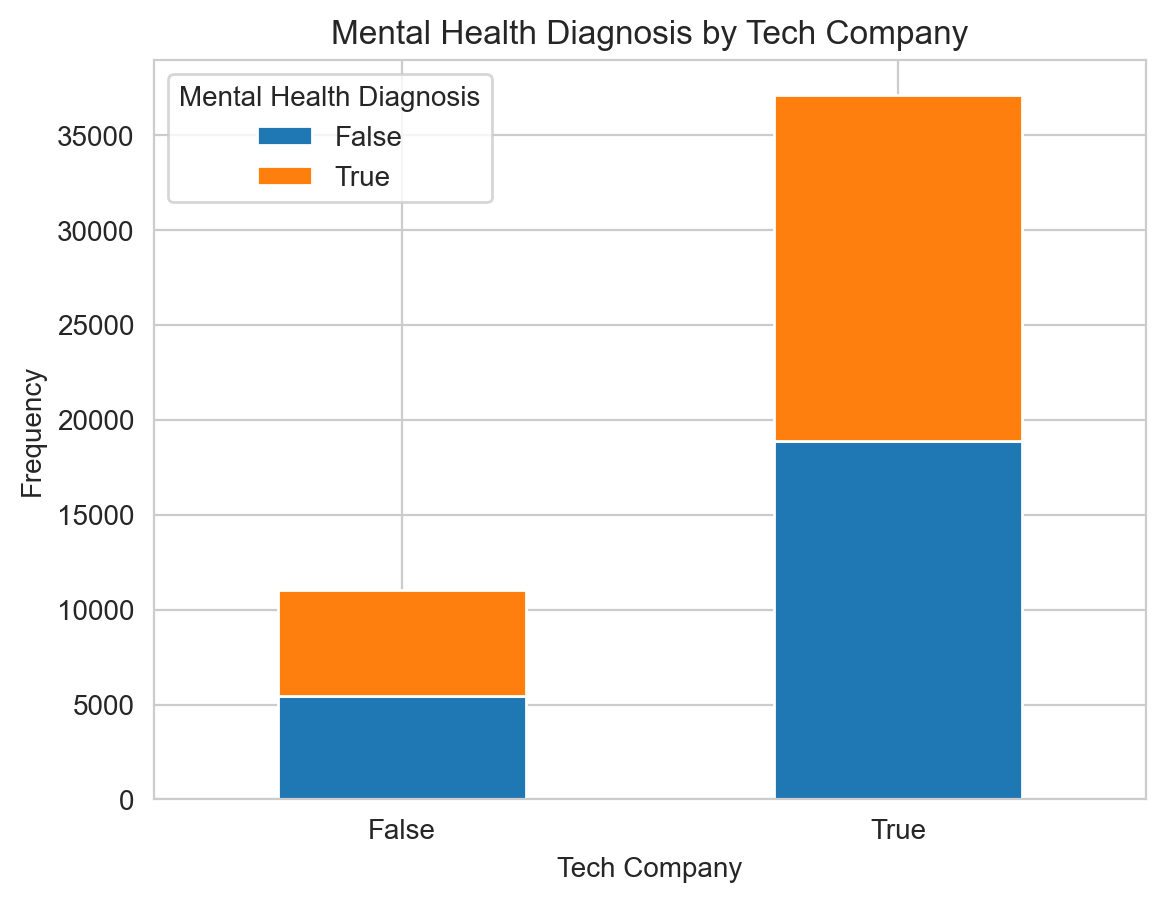

In [132]:
# create a heatmap of the correlation between top tech companies and mental health diagnosis
pd.crosstab(os['Tech_company'], os['Med_Prof_Diagnose']).plot(kind='bar', stacked=True)
plt.title('Mental Health Diagnosis by Tech Company')
plt.ylabel('Frequency')
plt.xlabel('Tech Company')
plt.xticks(rotation=0)
plt.legend(title='Mental Health Diagnosis');

- This distribution is just to show the proportion of tech companies to non-tech companies in the countries

- While not directly related to the tech aspect, this image gives valuable information into whether or not a family history of mental illness plays a role.

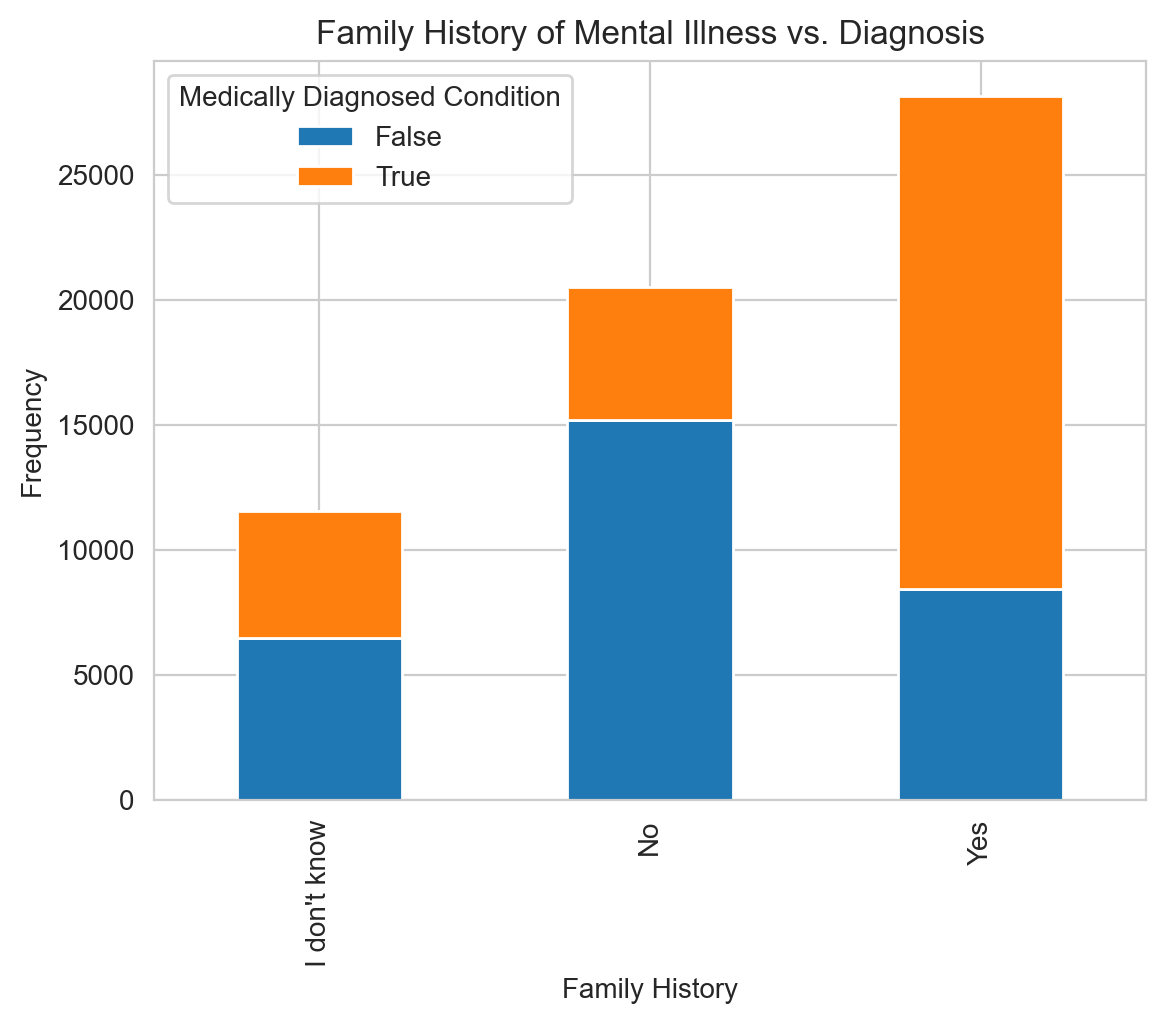

In [133]:
# Group the data by 'Family_hist' and 'Diagnosed' and calculate counts
stacked_data = os.groupby(['Family_hist', 'Med_Prof_Diagnose']).size().unstack()

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True)

# Add titles and labels
plt.title('Family History of Mental Illness vs. Diagnosis')
plt.ylabel('Frequency')
plt.xlabel('Family History')
plt.legend(title='Medically Diagnosed Condition', loc='upper left');

This plot was a little interesting and slightly predictable knowing how mental illness often runs in families.

- This next visual is a little interesting because it is looking at if mental health disorders are more prevalent in larger or smaller companies.

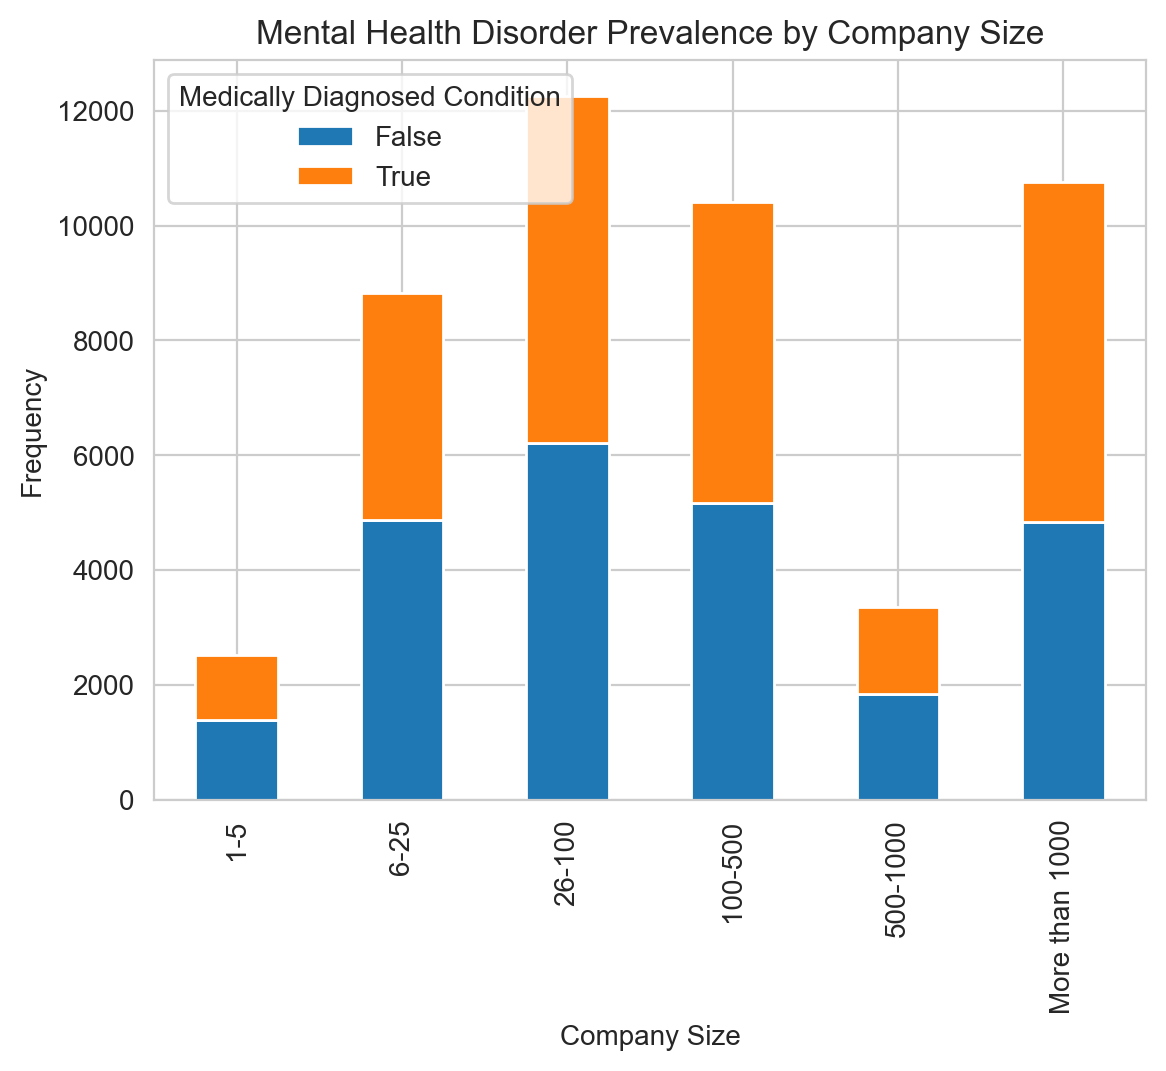

In [134]:
# make a Bar chart of mental health disorder prevalence by company size
company_size_counts = os.groupby(['Size_company', 'Med_Prof_Diagnose']).size().unstack()

# Define the desired order of company sizes
company_size_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Reindex the DataFrame to match the desired order
company_size_counts = company_size_counts.reindex(company_size_order, fill_value=0)

# Plot the stacked bar chart
company_size_counts.plot(kind='bar', stacked=True)

# Add titles and labels
plt.title('Mental Health Disorder Prevalence by Company Size')
plt.ylabel('Frequency')
plt.xlabel('Company Size')
plt.legend(title='Medically Diagnosed Condition', loc='upper left')
plt.show()

We can see this plot did not show us much about if company size influences mental health diagnosis.

Here is a word cloud consisting of the most popular words from the diagnosed conditions column.

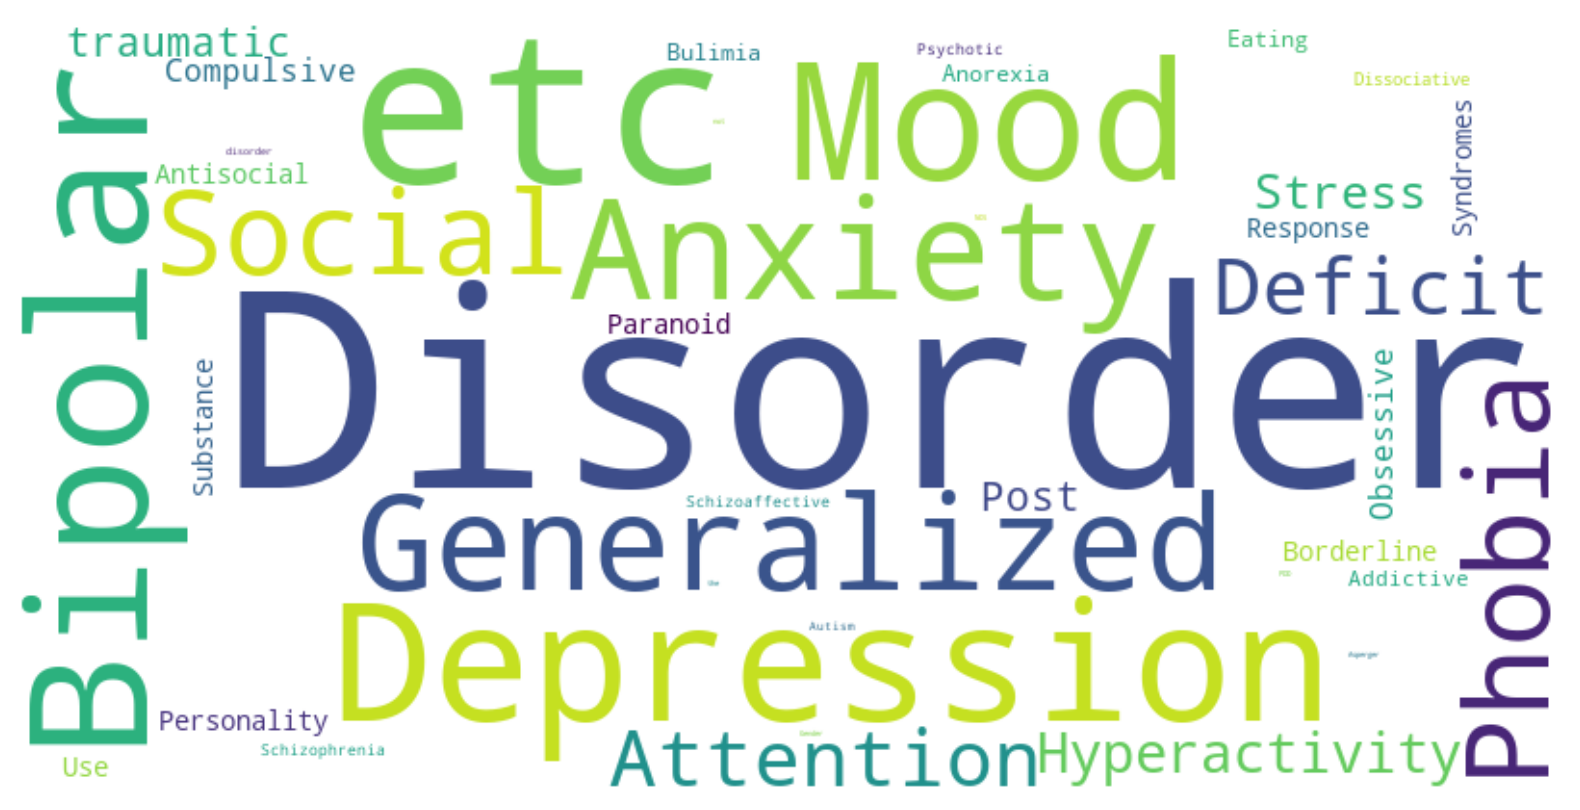

In [135]:
# create Word cloud of common mental health conditions mentioned.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
# Create a single string of all the diagnosed conditions
diagnosed_conditions = ' '.join(os['Diagnosed_Conditions'].dropna())
# Use regex to find all words in the string
words = re.findall(r'\w+', diagnosed_conditions)
# Count the frequency of each word
word_counts = Counter(words)
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This next chart is concerning whether or not a tech role at the company affects the proportion of mental illness.

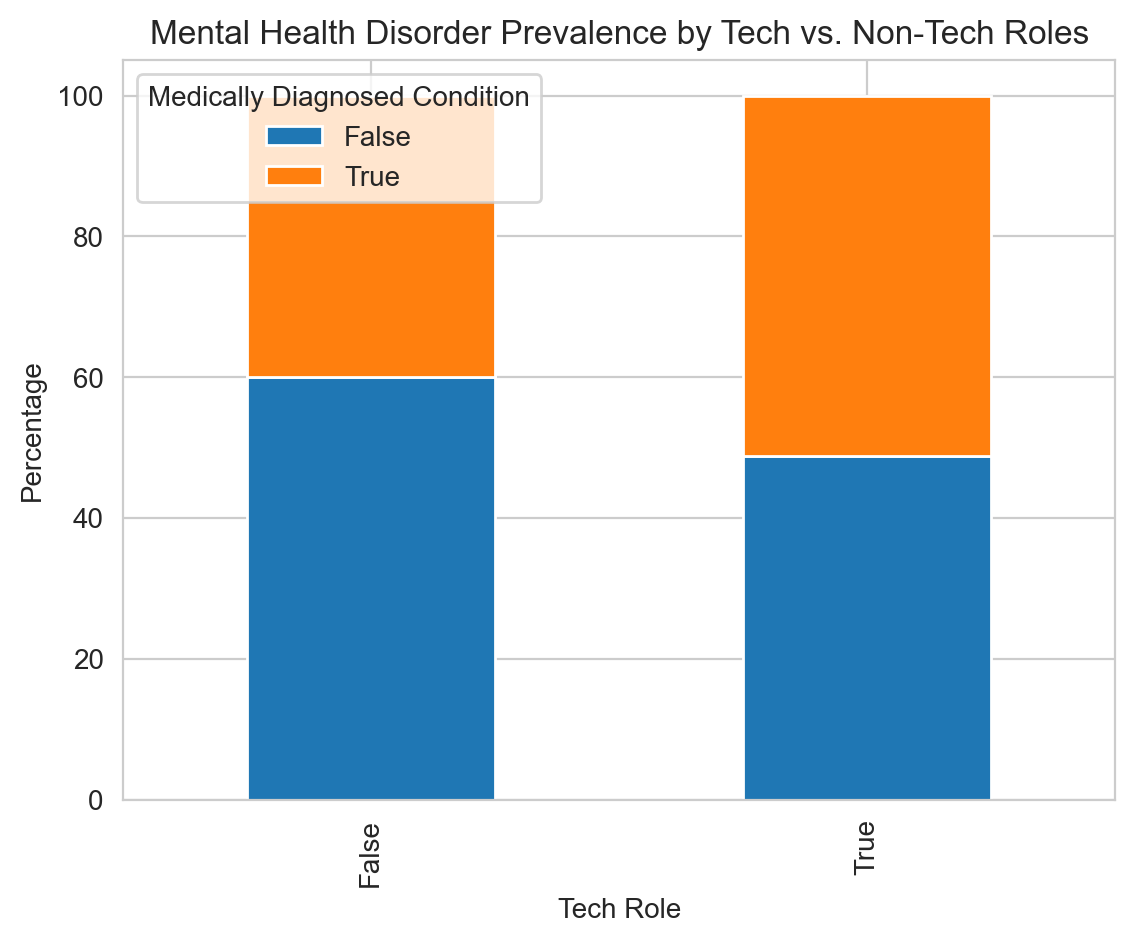

In [136]:
# create bar chart of tech vs. non-tech roles and mental health disorder percentages.
# Create a DataFrame to hold the percentages
tech_non_tech_counts = os.groupby(['TechIT_Job', 'Med_Prof_Diagnose']).size().unstack()
# Calculate the percentages
tech_non_tech_percentages = tech_non_tech_counts.div(tech_non_tech_counts.sum(axis=1), axis=0) * 100
# Plot the percentages
tech_non_tech_percentages.plot(kind='bar', stacked=True)
# Add titles and labels
plt.title('Mental Health Disorder Prevalence by Tech vs. Non-Tech Roles')
plt.ylabel('Percentage')
plt.xlabel('Tech Role')
plt.legend(title='Medically Diagnosed Condition', loc='upper left');


Here is an interactive boxplot showing the distribution of age across those with and without a mental health diagnosis.

In [137]:
import plotly.express as px
import pandas as pd

# Create an interactive boxplot with Plotly
fig = px.box(
    os,
    x='Med_Prof_Diagnose',
    y='Age',
    points="outliers",  # Show only outliers
    hover_data=['Age'],  # Add hover information
    title='Age Distribution by Mental Health Diagnosis',
    labels={'Med_Prof_Diagnose': 'Medically Diagnosed Condition', 'Age': 'Age'}
)

# Add descriptive statistics (min, max, Q1, Q3, median) automatically
fig.update_traces(boxmean=True)  # Show mean on the boxplot

# Show the plot
fig.show()

This box plot shows that they have very similar distributions.

### Inferential statistics

Now we are checking statistically how mental health diagnosis is affected by different factors using chi-square tests.

### Is there a difference in mental health diagnosis between those who work in tech companies and those who do not?

In [138]:
# run a chi-squared test to see if there is a significant difference in mental health diagnosis between those who work in tech companies and those who do not
# Create a contingency table
contingency_table = pd.crosstab(os['Tech_company'], os['Med_Prof_Diagnose'])
# Perform the chi-squared test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# Print the results
print(f'Chi-squared statistic: {chi2_stat}, P-value: {p_value}, Degrees of freedom: {dof}')
# Interpret the results
if p_value < 0.05:
    print('There is a significant difference in mental health diagnosis between those who work in tech companies and those who do not.')
else:
    print('There is no significant difference in mental health diagnosis between those who work in tech companies and those who do not.')

Chi-squared statistic: 6.80600217522222, P-value: 0.009085194696035621, Degrees of freedom: 1
There is a significant difference in mental health diagnosis between those who work in tech companies and those who do not.


### Is there a difference in mental health diagnosis at different sized companies?

In [139]:
# run a test to see if there is a significance in mental health diagnosis and different company sizes
# Create a contingency table
contingency_table_size = pd.crosstab(os['Size_company'], os['Med_Prof_Diagnose'])
# Perform the chi-squared test
chi2_stat_size, p_value_size, dof_size, expected_size = stats.chi2_contingency(contingency_table_size)
# Print the results
print(f'Chi-squared statistic: {chi2_stat_size}, P-value: {p_value_size}, Degrees of freedom: {dof_size}')
# Interpret the results
if p_value_size < 0.05:
    print('There is a significant difference in mental health diagnosis between different company sizes.')
else:
    print('There is no significant difference in mental health diagnosis between different company sizes.')

Chi-squared statistic: 264.2365248158145, P-value: 4.83612041400545e-55, Degrees of freedom: 5
There is a significant difference in mental health diagnosis between different company sizes.


### Is there a difference in mental health diagnosis between those who work remotely and those who do not?

In [140]:
# conduct a chi-squared test to see if there is a significant difference in mental health diagnosis and working remotely
# Create a contingency table
contingency_table_remote = pd.crosstab(os['Remotely'], os['Med_Prof_Diagnose'])
# Perform the chi-squared test
chi2_stat_remote, p_value_remote, dof_remote, expected_remote = stats.chi2_contingency(contingency_table_remote)
# Print the results
print(f'Chi-squared statistic: {chi2_stat_remote}, P-value: {p_value_remote}, Degrees of freedom: {dof_remote}')
# Interpret the results
if p_value_remote < 0.05:
    print('There is a significant difference in mental health diagnosis between those who work remotely and those who do not.')
else:
    print('There is no significant difference in mental health diagnosis between those who work remotely and those who do not.')

Chi-squared statistic: 152.82578831401045, P-value: 6.520812630764127e-34, Degrees of freedom: 2
There is a significant difference in mental health diagnosis between those who work remotely and those who do not.


### Is there a difference in mental health diagnosis between the different age groups?

In [141]:
# conduct a chi-squared test to see if there is a significant difference in mental health diagnosis and age group
# Create a contingency table
contingency_table_age = pd.crosstab(os['Age_Group'], os['Med_Prof_Diagnose'])
# Perform the chi-squared test
chi2_stat_age, p_value_age, dof_age, expected_age = stats.chi2_contingency(contingency_table_age)
# Print the results
print(f'Chi-squared statistic: {chi2_stat_age}, P-value: {p_value_age}, Degrees of freedom: {dof_age}')
# Interpret the results
if p_value_age < 0.05:
    print('There is a significant difference in mental health diagnosis between different age groups.')
else:
    print('There is no significant difference in mental health diagnosis between different age groups.')

Chi-squared statistic: 639.1698638317135, P-value: 7.073171860133936e-131, Degrees of freedom: 10
There is a significant difference in mental health diagnosis between different age groups.


Visualizations such as bar plots helped illustrate the distribution of responses across different categories, and chi-square tests were used to assess the statistical significance of observed patterns. While some relationships, such as the impact of employer support on treatment-seeking, reached statistical significance, others—such as gender differences—were not uniformly significant across all subgroups. These results suggest that while support systems matter, the picture is complex and influenced by multiple factors.

### Decision Tree

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [143]:
df = pd.read_csv('OSMI_Survey_Data.csv')
df.columns = ['index', 'ResponseID', "Self_employed", "Size_company", "Tech_company", "TechIT_Job", "Previous_employer", "Family_hist", "Past_MentalHealth", "Current_MentalHealth", "Yes_Current_Conditions", "Maybe_Believed_Conditions", "Med_Prof_Diagnose", "Diagnosed_Conditions", "Sought_Treatment", "Age", "Gender", "Age_Group", "Country_live", "US_State/territory_live", "Country_work", "US_State/territory_work", "Work_description", "Remotely", "Question Group", "Speak_openly", "Question", "Response"]

In [144]:
# Encode the target variable (mental health diagnosis)
df['Med_Prof_Diagnose_Encoded'] = df['Med_Prof_Diagnose'].map({True: 1, False: 0})

# Encode the feature variable (company size)
df['Size_company_Encoded'] = df['Size_company'].map({
    '1-5': 1, '6-25': 2, '26-100': 3, '100-500': 4, '500-1000': 5, 'More than 1000': 6
})

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=['Med_Prof_Diagnose_Encoded', 'Size_company_Encoded'])

# Define features (X) and target (y)
X = df[['Size_company_Encoded']]
y = df['Med_Prof_Diagnose_Encoded']

In [145]:
df['Med_Prof_Diagnose']

0         True
1         True
2         True
3         True
4         True
         ...  
60181    False
60182    False
60183    False
60184    False
60185    False
Name: Med_Prof_Diagnose, Length: 48132, dtype: bool

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [148]:
# Make predictions
y_pred = clf.predict(X_test)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      7342
           1       0.52      0.47      0.49      7098

    accuracy                           0.53     14440
   macro avg       0.53      0.53      0.53     14440
weighted avg       0.53      0.53      0.53     14440

Accuracy: 0.53


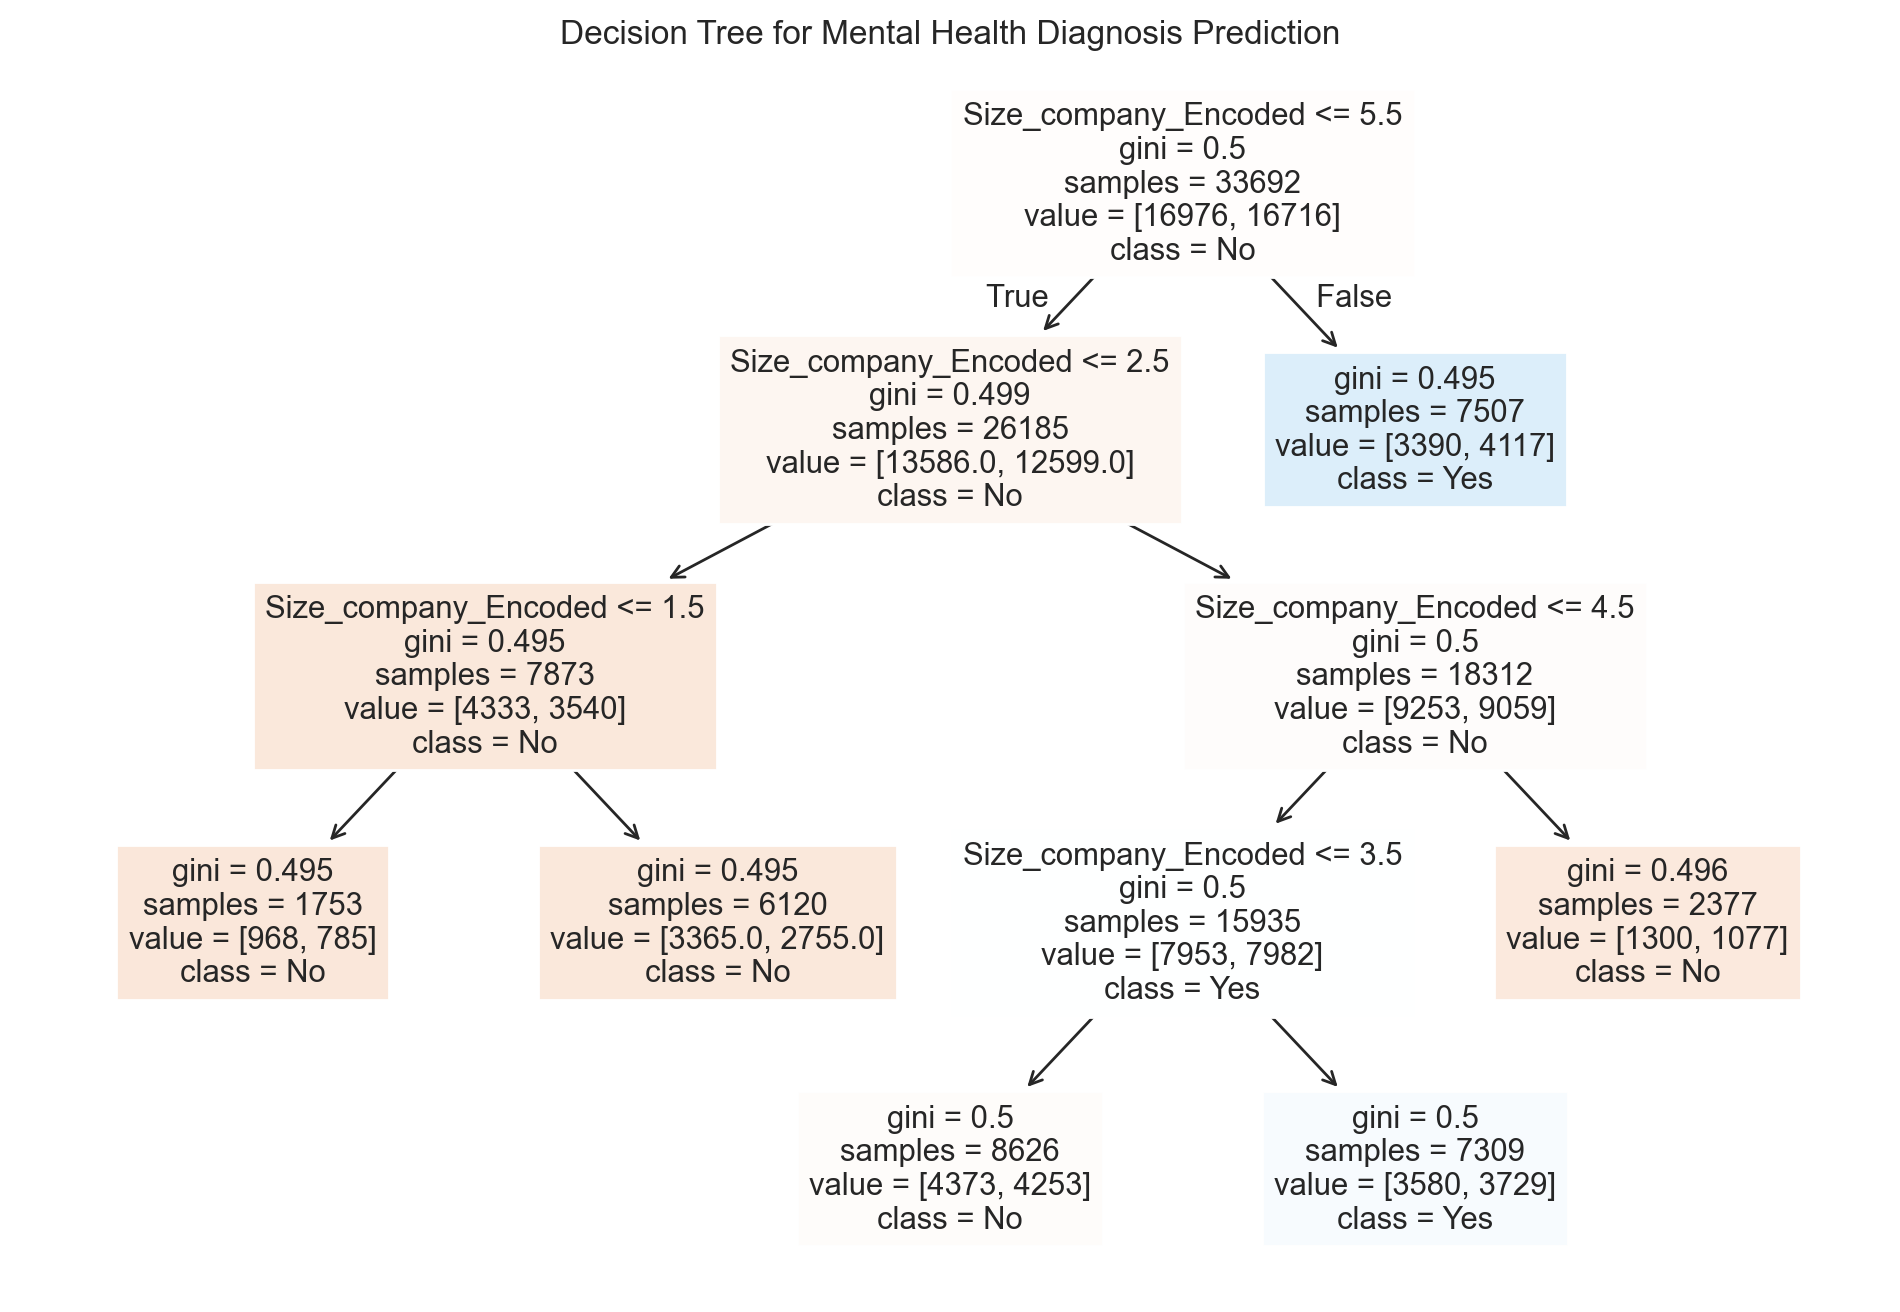

In [149]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Size_company_Encoded'], class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree for Mental Health Diagnosis Prediction')
plt.show()

The decision tree results suggest that company size plays a relatively weak role in predicting mental health diagnoses. Across most splits on company size, the distribution between predicted diagnoses ("Yes" or "No") remains fairly balanced, as reflected by consistently high Gini impurity values (approximately 0.49 to 0.5) at nearly every node. Individuals working at smaller companies (Size_company_Encoded ≤ 5.5, corresponding to organizations with fewer than 1,000 employees) comprise the majority of the sample. However, within this group, the model does not show a strong predictive bias toward either outcome. For larger companies (Size_company_Encoded > 5.5, or organizations with more than 1,000 employees), the model leans slightly toward predicting a diagnosis, though the split remains relatively even. Within smaller organizations, particularly those with 1–5 employees (Size_company_Encoded ≤ 1.5), the model tends to predict "No" more frequently, although the margin is modest. Even after additional splits, such as those distinguishing between "6–25" and "26–100" employees, the prediction remains mixed and uncertain. Overall, the decision tree structure—marked by high impurity and balanced class distributions—indicates that company size alone is not a strong predictor of mental health outcomes. This interpretation is further supported by the classification report, which shows precision, recall, and F1-scores near 0.5 for both classes and an overall accuracy of 53%, suggesting that the model's performance is only marginally better than random guessing.

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60      9075
           1       0.54      0.37      0.44      8981

    accuracy                           0.53     18056
   macro avg       0.53      0.53      0.52     18056
weighted avg       0.53      0.53      0.52     18056

Accuracy: 0.53


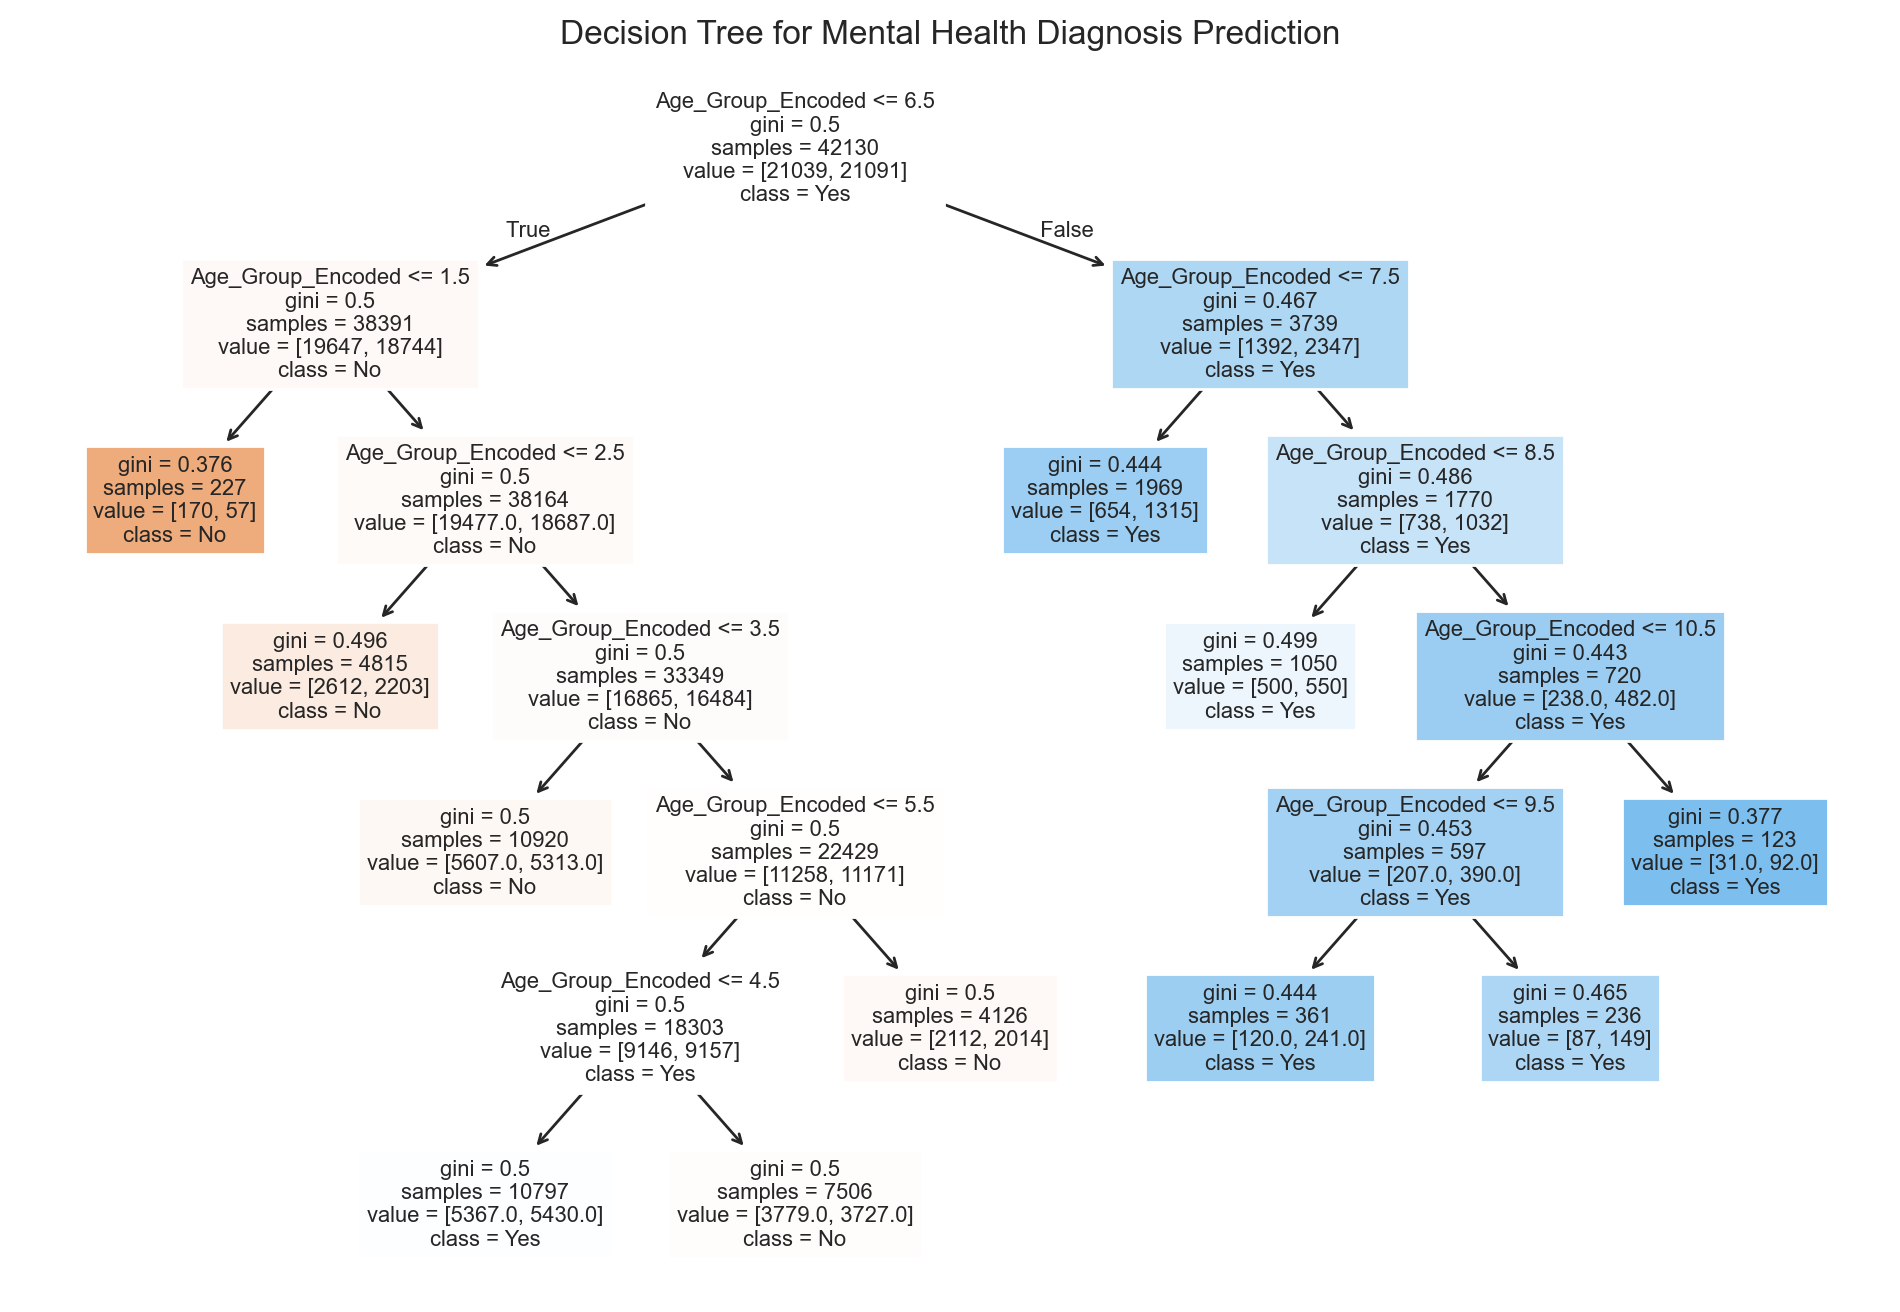

In [150]:
# make a decision tree based on mental health diagnosis and age group
# Encode the target variable (mental health diagnosis)
os['Med_Prof_Diagnose_Encoded'] = os['Med_Prof_Diagnose'].map({True: 1, False: 0})
# Encode the feature variable (age group)
os['Age_Group_Encoded'] = os['Age_Group'].map({'Under 20': 1,
    '20-25': 2, '26-30': 3, '31-35': 4, '36-40': 5, '41-45': 6, '46-50': 7, '51-55': 8, '56-60': 9, '61-65': 10, 'Over 65': 11})
# Drop rows with missing values in the relevant columns
os = os.dropna(subset=['Med_Prof_Diagnose_Encoded', 'Age_Group_Encoded'])
# Define features (X) and target (y)
X = os[['Age_Group_Encoded']]
y = os['Med_Prof_Diagnose_Encoded']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
# Fit the model
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Age_Group_Encoded'], class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree for Mental Health Diagnosis Prediction')
plt.show()


The decision tree indicates that age group plays a moderate role in predicting mental health diagnoses. Individuals in older age groups (Age_Group_Encoded ≥ 7, corresponding to ages 46 and above) show a stronger tendency toward reporting a diagnosis, with nodes in these branches generally predicting “Yes.” In contrast, younger age groups (Age_Group_Encoded ≤ 6, covering those aged 45 and younger) tend to display more balanced outcomes or lean slightly toward “No” diagnoses. Notably, the youngest individuals (Age_Group_Encoded = 1, representing those under 20) have the lowest likelihood of reporting a diagnosis. Overall, age exhibits a clearer and more consistent predictive pattern compared to company size, particularly among older populations.

This interpretation is supported by the model’s classification report, which shows a precision of 0.53 for "No" diagnoses and 0.54 for "Yes" diagnoses. The recall, however, is higher for "No" cases (0.69) compared to "Yes" cases (0.37), suggesting that the model is more successful at correctly identifying individuals without a diagnosis than those with one. The F1-scores are 0.60 for "No" and 0.44 for "Yes," indicating a moderate imbalance in predictive performance between the two classes. The overall model accuracy is 53%, demonstrating that while age group provides some predictive power, the model's ability to generalize remains limited.


### Review

The analysis began by identifying the geographic distribution of respondents employed by tech companies. The majority were located in the United States (59.4%), followed by the United Kingdom (12.8%), Canada (5.2%), Germany (4.0%), and the Netherlands (3.3%). This suggests a primarily Western, English-speaking respondent pool, which may influence the generalizability of findings.

Chi-square tests were conducted to examine relationships between various workplace and demographic factors and the likelihood of having a mental health diagnosis. There was a statistically significant difference in diagnosis rates between those employed by tech companies and those who were not (χ² = 6.81, p = 0.009), indicating that workplace context may influence mental health outcomes. Company size also showed a strong association with diagnosis rates (χ² = 264.24, p < 0.001), with larger companies possibly offering more structured support or having greater awareness around mental health issues.

Remote work status was another significant factor (χ² = 152.83, p < 0.001), with remote workers differing meaningfully in diagnosis rates from their in-office counterparts. Additionally, age was a major predictor of diagnosis, as the chi-square test indicated a highly significant difference across age groups (χ² = 639.17, p < 0.001). These results highlight that age and work environment play important roles in how mental health issues are experienced and reported.

To better understand the predictive power of these variables, a decision tree classifier was applied to model whether a respondent had sought treatment for a mental health condition. The model's performance, as evaluated on two different train-test splits, showed modest predictive ability. In one case, the model achieved an accuracy of 53%, with precision and recall values hovering around 0.52–0.53 for both treatment and non-treatment classes. The F1-scores were similarly low (0.49–0.60 across the two models), suggesting that while the model could distinguish some signal in the data, its practical utility is limited—likely due to overlapping characteristics among those who seek treatment and those who do not.

These findings underscore the complexity of mental health in the tech industry. Although certain demographic and workplace factors are associated with higher diagnosis or treatment rates, predictive modeling revealed the nuanced and individual nature of treatment-seeking behavior. The results suggest that organizational policies and cultural factors—rather than demographic predictors alone—may be more effective targets for improving mental health outcomes.

## Conclusion

This analysis offers a snapshot of mental health experiences among professionals in the tech industry. The data highlights several factors that may influence whether individuals seek treatment for mental health concerns, including company size, age, and remote work status. These associations point to the role that workplace context and demographic background can play in shaping mental health outcomes. However, not all observed patterns were statistically significant, particularly those related to gender differences, which may reflect sampling limitations or deeper complexities not fully captured by the survey.

The decision tree classifier used in this study provided additional insight into the predictors of treatment-seeking behavior, though its moderate performance emphasized the multifaceted nature of mental health decisions. Factors like age, remote work status, and company size showed strong associations with mental health outcomes, but predictive modeling also revealed the limitations of relying solely on survey variables to capture such a nuanced issue.

Overall, while the findings are informative, they also point to the need for further investigation using more recent and comprehensive data. Additional research could explore the impact of remote work, evolving company cultures, and broader demographic factors. Mental health continues to be a critical concern in the tech field, and ongoing efforts to understand and support those affected are essential. Future studies should aim to integrate longitudinal data, qualitative feedback, and emerging workplace trends to build a more holistic understanding of mental health in the technology sector.

## References

This analysis utilized data from the 2014 Mental Health in Tech Survey conducted by Open Sourcing Mental Illness (OSMI), which is publicly available through Kaggle. To contextualize the dataset and inform the interpretation of findings, relevant literature was consulted, including Evans and Kotze’s (2019) study on the impact of stigma on mental health among technology professionals. 

Evans, R., & Kotze, J. (2019). Mental health in tech: A quantitative study. Retrieved from https://osmihelp.org

Open Sourcing Mental Illness. (2014). Mental Health in Tech Survey 2014 [Data set]. Kaggle. https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey